# Red Wine Quality Project




Use machine learning to determine which physicochemical properties make a wine 'good'!



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

import warnings
warnings.simplefilter("ignore")
%matplotlib inline


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


NO MISSING DATA IN THE COLUMNS

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
df['quality'].count()

1599

<AxesSubplot:xlabel='quality', ylabel='count'>

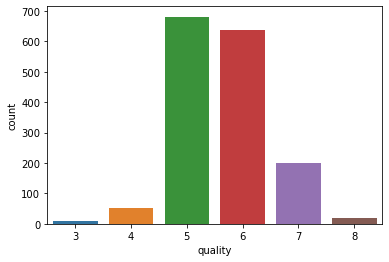

In [8]:
sns.countplot(x='quality',data=df)

In [9]:
df1=df.select_dtypes([np.int,np.float])

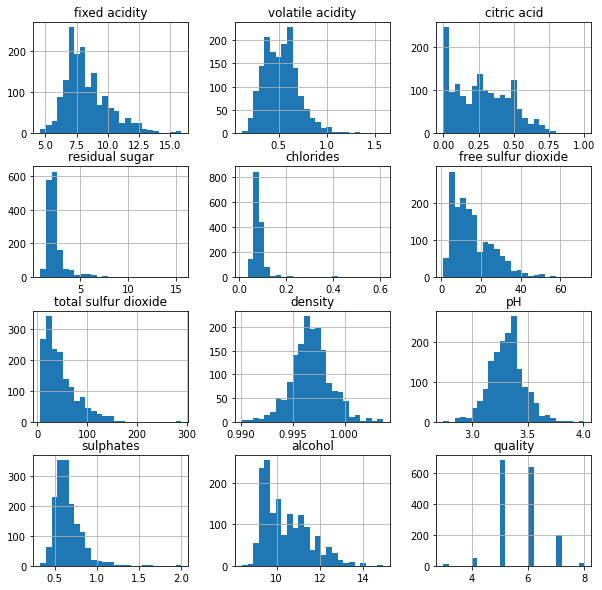

In [10]:
df.hist(bins=25,figsize=(10,10))
# display histogram
plt.show()


From the above we can view :
Quality are in discrete numbers, and not a continous variable. Most of the wine are rated '5' & '6', with much fewer in the other numbers. Let's look at the correlation among the variables using Correlation chart.


<AxesSubplot:xlabel='quality', ylabel='alcohol'>

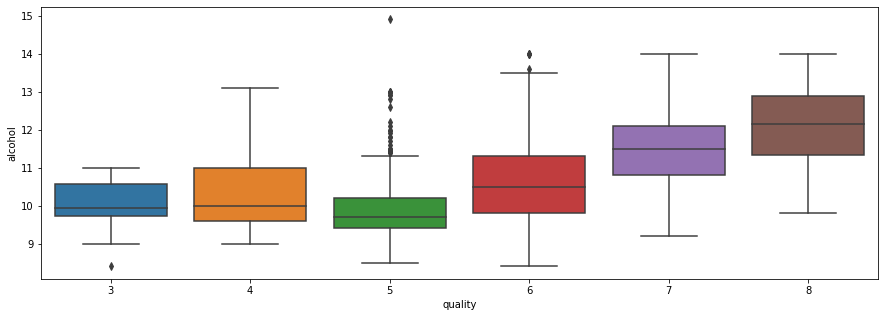

In [11]:
plt.figure(figsize=(15,5))
sns.boxplot(x="quality", y="alcohol",data=df)

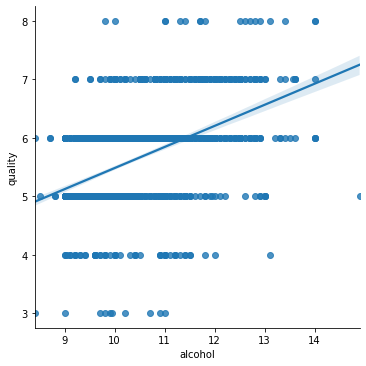

In [12]:
sns.lmplot(x='alcohol',y='quality',data=df)
          


<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

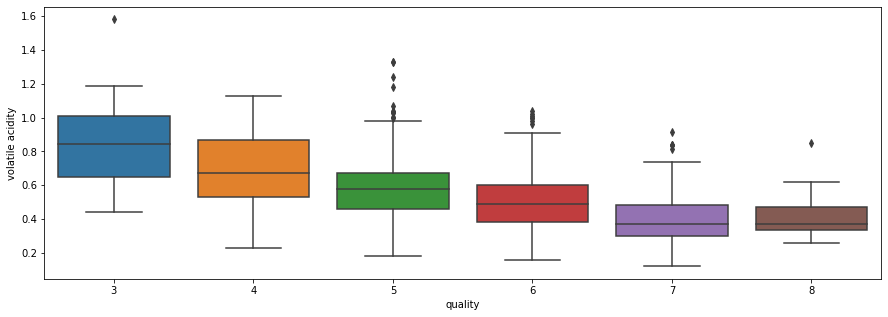

In [13]:
plt.figure(figsize=(15,5))
sns.boxplot(x="quality", y="volatile acidity",data=df)

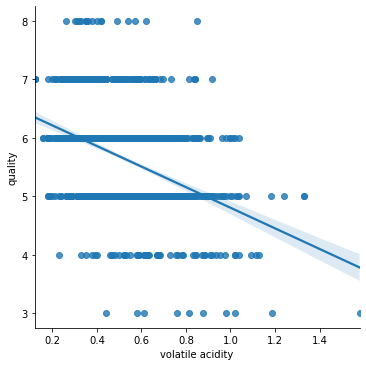

In [14]:
sns.lmplot(x='volatile acidity',y='quality',data=df)


# Plotting Heatmap (Correlation Matrix)

<AxesSubplot:>

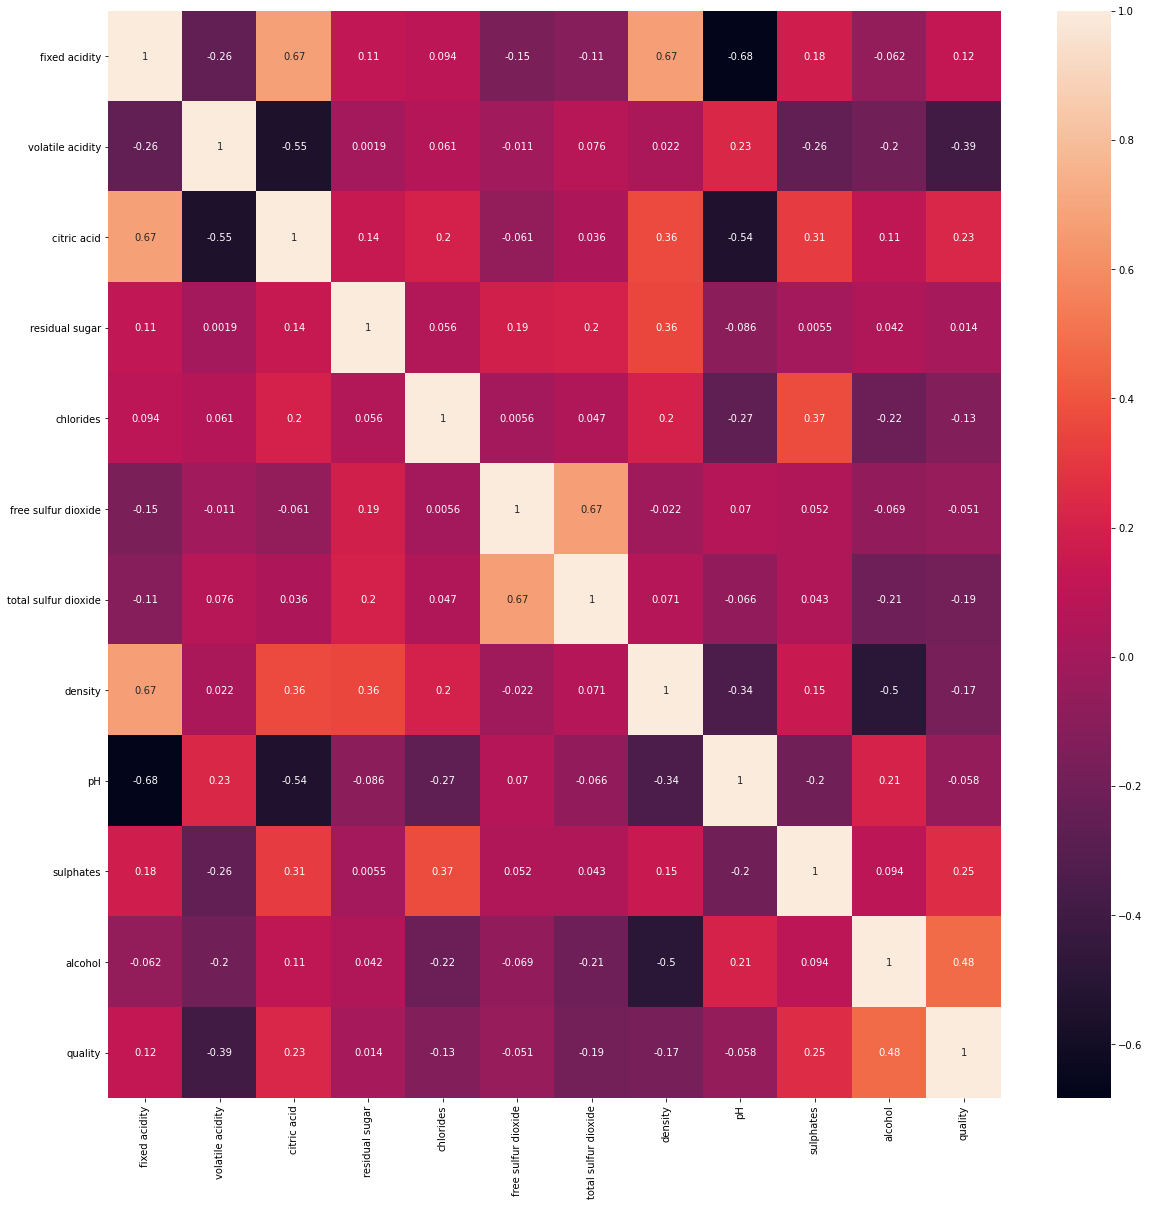

In [15]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),color='k', annot=True)


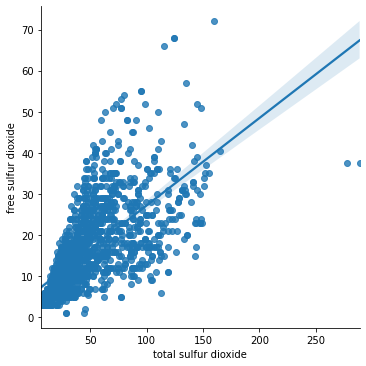

In [16]:
sns.lmplot(x="total sulfur dioxide",y = "free sulfur dioxide",data=df)

# Creating Classification

In [17]:
bins = (2,6.5,8)
group_names=['bad','good']
df['quality'] = pd.cut(df['quality'],bins=bins,labels=group_names)

In [18]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC , LinearSVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV,cross_val_score
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier


# Classification using LabelEncoder

In [19]:
label_quality = LabelEncoder()

In [20]:
df['quality'] = label_quality.fit_transform(df['quality'])

In [21]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


# SETTING DEPENDENT & INDEPENDENT VARIABLE

In [22]:
y=df.quality
x=df.drop('quality',axis=1)

# SPLIT / TRAIN TEST

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# SCALING DATA TO TAKE ACCOUNT OF VARIATION IN MEAN & STANDARD DEVIATION

In [55]:
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# ML MODEL

In [ ]:
def models(x_train,y_train):
    from sklearn.linear_model import LogisticRegression
    log=LogisticRegression(random_state=0)
    log.fit(x_train,y_train) 
    
    from sklearn.neighbors import KNeighborsClassifier
    knn=KNeighborsClassifier(n_neighbors = 5 , metric='minkowski',p=2)
    knn.fit(x_train,y_train) 
    
    from sklearn.svm import SVC
    svc_lin=SVC(kernel='linear',random_state=0)
    svc_lin.fit(x_train,y_train)
    
    from sklearn.svm import SVC
    svc_rbf=SVC(kernel='rbf',random_state=0)
    svc_rbf.fit(x_train,y_train)
    
    from sklearn.naive_bayes import GaussianNB
    gauss=GaussianNB()
    gauss.fit(x_train,y_train)

    from sklearn.tree import DecisionTreeClassifier
    tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
    tree.fit(x_train,y_train)

    from sklearn.ensemble import RandomForestClassifier    
    forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
    forest.fit(x_train,y_train)
    
print('[0]Logistic Regression Training Accuracy:',log.score(x_train,y_train))
print('[1]Nearest Neighbor Training Accuracy:',knn.score(x_train,y_train))
print('[2]Support Vector Machin Linear Classifier Training Accuracy:',svc_lin.score(x_train,y_train))
print('[3]Support Vector RBF Classifier Training Accuracy:',svc_rbf.score(x_train,y_train))
print('[4]Gussain Naive Bayes Training Accuracy:',gauss.score(x_train,y_train))
print('[5]DEcision Tree Classifier Training Accuracy:',tree.score(x_train,y_train))
print('[6]Random Forest Classifier Training Accuracy:',forest.score(x_train,y_train))

return log, knn, svc_lin, svc_rbf, gauss, tree,forest



# Print model Accuracy

In [ ]:
print('[0]Logistic Regression Training Accuracy:',log.score(x_train,y_train))
print('[1]Nearest Neighbor Training Accuracy:',knn.score(x_train,y_train))
print('[2]Support Vector Machin Linear Classifier Training Accuracy:',svc_lin.score(x_train,y_train))
print('[3]Support Vector RBF Classifier Training Accuracy:',svc_rbf.score(x_train,y_train))
print('[4]Gussain Naive Bayes Training Accuracy:',gauss.score(x_train,y_train))
print('[5]DEcision Tree Classifier Training Accuracy:',tree.score(x_train,y_train))
print('[6]Random Forest Classifier Training Accuracy:',forest.score(x_train,y_train))

return log, knn, svc_lin, svc_rbf, gauss, tree,forest

In [58]:
model = models(x_train,y_train)